# Combine Numeric and Categorical Features

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def read_df(filename, valtype):
    df = pd.read_csv(filename, low_memory=False, dtype=valtype)
    return df

In [4]:
from collections import OrderedDict, defaultdict

def create_combined_df(input_dict):
    fdf = pd.DataFrame()
    cols = OrderedDict()
    for k, v in input_dict.items():
        df = read_df('./data/'+k, v)
        colnames = [c for c in df.columns if c not in ['None', 'Unnamed: 0']]
        cols[k] = colnames
        fdf = pd.concat([fdf, df], axis=1)
    
    # fdf = fdf.DataFrame(fdf, columns=cols)
    fdf = fdf.drop(['None', 'Unnamed: 0'], axis=1)
    return fdf, cols

# Read all data

In [127]:
y_train = pd.read_csv('./data/fin_train_indeps.csv', encoding='utf8')
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_train.sample()

,review_scores_rating
118846,96.0


In [129]:
np.unique(y_train)

array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

In [128]:
y_test = pd.read_csv('./data/fin_train_indeps.csv', encoding='utf8')
y_test = y_test.drop(['Unnamed: 0'], axis=1)
y_test.sample()

,review_scores_rating
11071,94.0


In [130]:
np.unique(y_test)

array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.])

In [131]:
num_train = pd.read_csv('./data/fin_num_train_deps.csv')
num_train = num_train.drop(['Unnamed: 0'], axis=1)
num_test = pd.read_csv('./data/fin_num_test_deps.csv')
num_test = num_test.drop(['Unnamed: 0'], axis=1)

cat_train = pd.read_csv('./data/fin_cat_train_deps.csv')
cat_train = cat_train.drop(['Unnamed: 0'], axis=1)
cat_test = pd.read_csv('./data/fin_cat_test_deps.csv')
cat_test = cat_test.drop(['Unnamed: 0'], axis=1)

amen_train = pd.read_csv('./data/fin_amen_train_deps.csv')
amen_train = amen_train.drop(['Unnamed: 0'], axis=1)
amen_test = pd.read_csv('./data/fin_amen_test_deps.csv')
amen_test = amen_test.drop(['Unnamed: 0'], axis=1)

In [132]:
comb_train = pd.read_csv('./data/fin_comb_train_deps.csv')
comb_train = comb_train.drop(['Unnamed: 0'], axis=1)
comb_test = pd.read_csv('./data/fin_comb_test_deps.csv')
comb_test = comb_test.drop(['Unnamed: 0'], axis=1)

In [133]:
def run_prediction(X, y, Xt, yt, model):
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    if len(yt.shape) == 1:
        yt = yt.reshape(-1, 1)
    
    res = {'train': {}, 'test': {}}
    
    model.fit(X, y)
    
    train_pred = model.predict(X)
    res['train']['pred'] = train_pred
    
    test_pred = model.predict(Xt)
    res['test']['pred'] = test_pred
    
    
    for name, tup in zip(['train', 'test'], [(y, train_pred), (yt, test_pred)]):
        act, prd = tup[0].ravel(), tup[1].ravel()
        print 'Results for %s' % name
        
        mserr = mean_squared_error(act, prd)
        res[name]['mse'] = mserr
        print '%s Mean Squared Error: %.4f' % (name, mserr)
        
        rsq_score = r2_score(act, prd)
        res[name]['r2'] = rsq_score
        print '%s R-Squared: %.4f' % (name, rsq_score)
        
        plt.scatter(act, prd, alpha=0.5)
        plt.title(name+': predictions vs. actual')
        plt.show()
        plt.scatter(act, act-prd, alpha=0.5)
        plt.title(name+': residuals vs. actual')
        plt.show()
        plt.hist(act-prd, alpha=0.5)
        plt.title(name+': residuals histogram')
        plt.show()
    
    return res

In [160]:
def run_model(X, y, model, case='train'):
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    
    res = {}
    
    if 'train' == case:
        model.fit(X, y)
    
    y_pred = model.predict(X)
    # res['pred'] = y_pred
    

    # print 'Results for Training'

    mserr = mean_squared_error(y, y_pred)
    res['mse'] = mserr
    # print '%s Mean Squared Error: %.4f' % (case, mserr)

    rsq_score = r2_score(y, y_pred)
    res['r2'] = rsq_score
    # print '%s R-Squared: %.4f' % (case, rsq_score)
    
    # y = np.array(y).reshape(-1, 1)
    # print y.shape
    # print y_pred.shape
    # y_pred = y_pred.reshape(-1, 1)
    # plt.scatter(y, y_pred, alpha=0.5)
    # plt.title(case+': predictions vs. actual')
    # plt.show()
    # plt.scatter(y, y - y_pred, alpha=0.5)
    # plt.title(case+': residuals vs. actual')
    # plt.show()
    # plt.hist(y - y_pred, alpha=0.5)
    # plt.title(case+': residuals histogram')
    # plt.show()
    
    return model, res

In [171]:
def run_model_resgen(X, y, model, case='train', sample_sizes=[]):
    for ss in sample_sizes:
        np.random.seed(1234)
        rand_idxs = np.random.randint(0, X.shape[0], size=ss)
        X_s = X.iloc[rand_idxs]
        y_s = y.iloc[rand_idxs]
        
        yield run_model(X_s, y_s, model, case)

In [185]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

sample_sizes = [i for i in range(1000, num_train.shape[0], 1000)] + [num_train.shape[0]]

regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, max_iter=10000)


def plot_model_results(X, y, model, case, sample_sizes):
    mse = []
    r2 = []

    for _, r in run_model_resgen(X, y, model, case, sample_sizes):
        mse.append(r['mse'])
        r2.append(r['r2'])
    model = _

       
    fig, ax1 = plt.subplots()
    ax1.plot(sample_sizes, mse, 'b-', color='b', alpha=0.5)
    ax1.set_xlabel('sample size')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('MSE', color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(sample_sizes, r2, 'g-', color='g', alpha=0.5)
    ax2.set_ylabel('R2', color='g')
    ax2.tick_params('y', colors='g')

    fig.tight_layout()
    plt.title('MSE and R2 vs. training sample size') 
    plt.show()

    return (model, mse, r2)

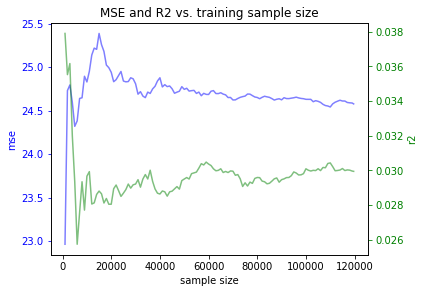

In [184]:
model, mse, r2 = plot_model_results(num_train, y_train, regr, 'train', sample_sizes)

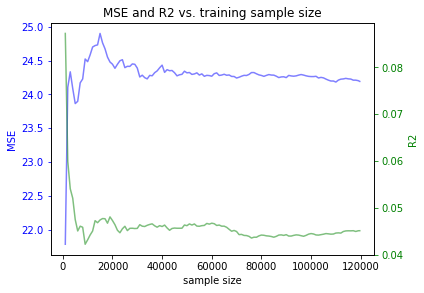

In [186]:
model, mse, r2 = plot_model_results(cat_train, y_train, regr, 'train', sample_sizes)

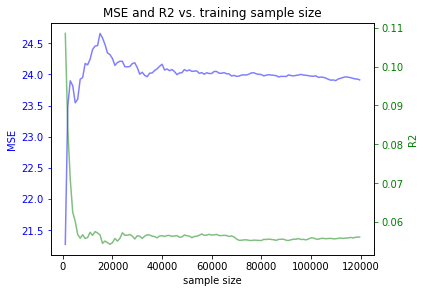

In [187]:
model, mse, r2 = plot_model_results(amen_train, y_train, regr, 'train', sample_sizes)

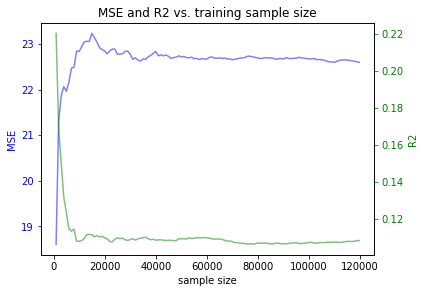

In [188]:
model, mse, r2 = plot_model_results(comb_train, y_train, regr, 'train', sample_sizes)